 * Copyright 2024 Xue_Lexiang
 * Licensed under MIT (https://github.com/xuelx1/LearnQC/LISENCE)

## Simon's Algorithm, 3-qubit case

### 1. Initialize

In [1]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister
import numpy as np
import random
import math

In [3]:
# set data

f_dict = {'000': '101', '001': '010', '010': '000', '011': '110', '100': '000', '101': '110', '110': '101', '111': '010'}

### 2.Map the circuit

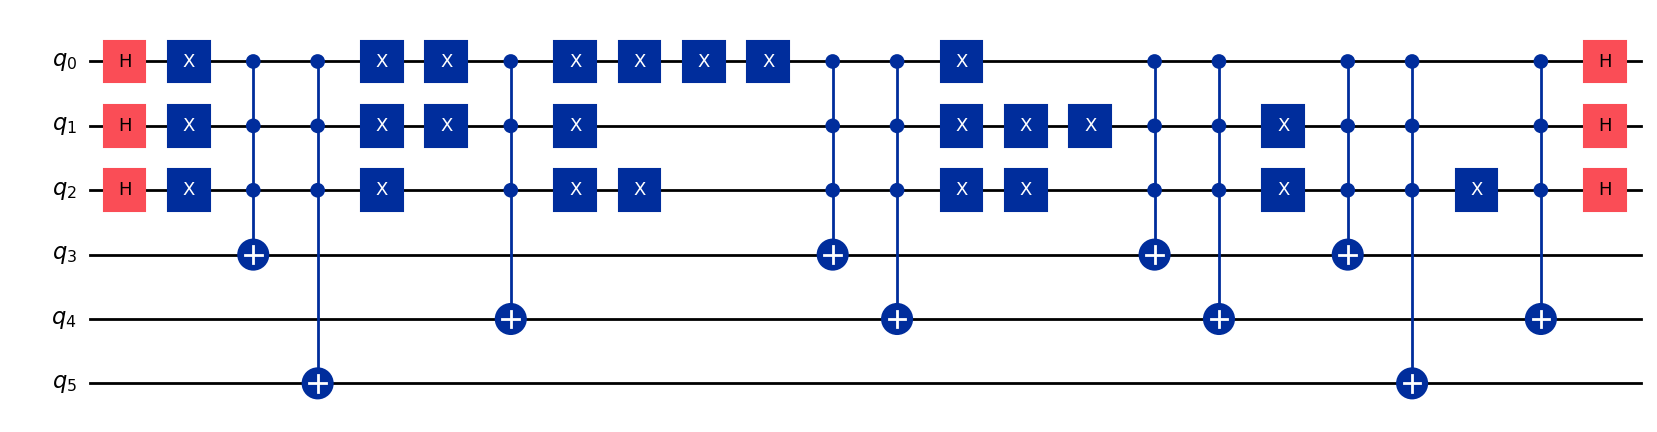

In [4]:
qc = QuantumCircuit(6)
gate = MCXGate(3)
for i in range(3):
    qc.h(i)

def sing_mul_oracle(qc, x, y):
    for i in range(3):
        if x[i]=='0':
            qc.x(i)
    for j in range(3):
        if y[j]=='1':
            qc.append(gate, [0,1,2, j+3])
    for i in range(3):
        if x[i]=='0':
            qc.x(i)
    return qc

def mul_oracle(qc, f_dict):
    for key, value in f_dict.items():
        qc = sing_mul_oracle(qc, key, value)
    return qc

qc = mul_oracle(qc, f_dict=f_dict)

for i in range(3):
    qc.h(i)
    
qc.draw(output='mpl')

### 3.Transpile and Measure

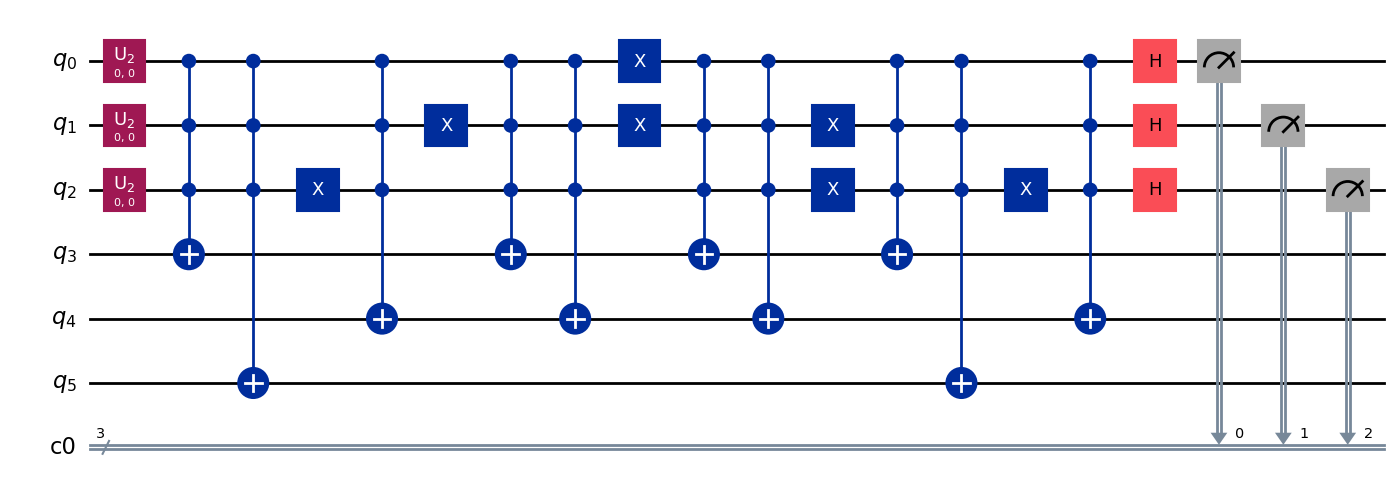

In [5]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=2)

c = ClassicalRegister(3)
qc.add_register(c)
for i in range(3):
    qc.measure(i, c[i])

qc.draw(output='mpl')

### 4.Execute and Process Results

In [6]:
results = execute_qc(qc)
print(results)

{'000': 258, '100': 250, '111': 257, '011': 259}


In [7]:
res_vecs = []
for key,_ in results.items():
    res_vec = [int(char) for char in key]
    res_vecs.append(res_vec)
res_array = np.array(res_vecs)
print(res_array)

[[0 0 0]
 [1 0 0]
 [1 1 1]
 [0 1 1]]


### 5.Solve Linear Equations

In [8]:
# forgive me for using exhaustion

digit_num = len(res_array[0])

def check_sol(A, x):
    for vec in A:
        if vec.dot(x) % 2 == 1:
            return False
    return True

def dec2bin(num):
    binary_str = bin(num)[2:]
    binary_str_fixed = binary_str.zfill(digit_num)
    return binary_str_fixed

def exhaustion(A):
    sol = []
    for i in range(1, 2**len(A[0])):
        x = [int(ch) for ch in dec2bin(i)]
        if check_sol(A, x):
            sol.append(x)
    return sol

    

In [9]:
sol = exhaustion(res_array)
print(sol)

[[0, 1, 1]]
